# Homework 2

## Econ 1680: MLTA and Econ

#### Name:

This assignment will cover applications of econometrics and machine learning we covered in class. For this assignment, you should write/type your answers into this notebook. You must also submit your python code. 

You may discuss the problem set with your class mates, but every student must do their own work. It is always important to cite our references that help us in our work. Please cite the students you work with here: ___ , ____, _____


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# I.     CODING EFFICIENCY AND COMMENTING
Points will be given according to the efficiency and cleanliness of your code. It should produce output that answers the questions from the homework only and everything should be commented. Furthermore, your writeup and code should be submitted both to Canvas through Gradescope. These points are meant to encourage and reward good coding habits.

# II.     SIMULATED DATA AND MODEL MISSPECIFICATION
#### 1.     Set the random seed to be equal to 1680.

In [5]:
# Write the code you need (if any) to answer the questions above
random.seed(1680)

1a.     Generate a random integer between (0,10). Hint: use random.randint

In [6]:
# Write the code you need (if any) to answer the questions above
print(random.randint(0,10))

4


1b.     What is that random integer? \
Answer: 4

1c.     Why is it important to set a random seed when coding random variables?\
Answer: it allows for reproducibility

#### 2. Comment to explain each line of code below and run the following code to generate data:
*You will need to copy and paste the code below into a code block*:
``` python
rng=np.random.RandomState(1680) 
N = 100
input_range = 4
X = np.sort(rng.rand(N)*input_range - input_range/2)
noise = rng.randn(N)*0.8
 
linear = 5*X +noise
quadratic =-2*X**2 +noise
cubic = X**3 - 0.5*X**2 + noise
```



In [3]:
# initializes a random number generator with a seed
rng=np.random.RandomState(1680) 
# sets N and input_range 
N = 100
input_range = 4
# generates an array of size N, multiplying each value by 4 (scales array between 0 and 4), and then subtracting 2 from each value (array now scaled between -2 and 2)
X = np.sort(rng.rand(N)*input_range - input_range/2)
# generates an array called noise, multiplying each value by 0.8 
noise = rng.randn(N)*0.8

# generates an array of linearly distributed variables 
linear = 5*X +noise
# generates an array of quadratic distributed variables 
quadratic =-2*X**2 +noise
# generates an array of cubic distributed variables 
cubic = X**3 - 0.5*X**2 + noise

#### 3. Produce a scatter plot that has all three series (linear, quadratic, and cubic) on the same set of axes with a legend identifying which color is which series and X on the x axis.
Insert graph here:


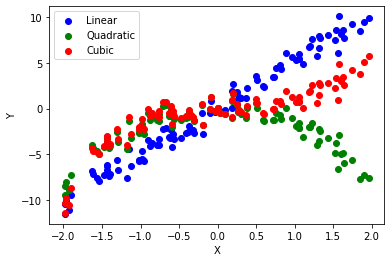

In [4]:

plt.scatter(X, linear, label='Linear', color='blue')
plt.scatter(X, quadratic, label='Quadratic', color='green')
plt.scatter(X, cubic, label='Cubic', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### 4. Run three OLS regressions of the following specification:
$$Y_i = b_1 * X$$
Where $Y_i$ is first the linear output (i=1), then the quadratic output (i=2), and then the cubic output (i=3).
$$ result_i = sm.OLS(Y_i,X).fit() $$
Label each of these fitted regressions result1, result2, result3, respectivelty. Then summarize the resutls together in one table using summary_col:
``` python
print(summary_col([result1,result2,result3],stars=True,
float_format='%0.2f', regressor_order=['x1'], info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))}, model_names =['Linear\n(Linear)', 'Linear\n(Quadratic)',      'Linear\n(Cubed)'],))
```
Insert that summary table here:


In [5]:
result1 = sm.OLS(linear, X).fit()
result2 = sm.OLS(quadratic, X).fit()
result3 = sm.OLS(cubic, X).fit()
print(summary_col([result1,result2,result3],stars=True,
float_format='%0.2f', regressor_order=['x1'], info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))}, model_names =['Linear\n(Linear)', 'Linear\n(Quadratic)','Linear\n(Cubed)'],))


                Linear     Linear    Linear
               (Linear) (Quadratic) (Cubed)
-------------------------------------------
x1             5.13***  0.29        2.42***
               (0.07)   (0.30)      (0.15) 
R-squared      0.98     0.01        0.72   
R-squared Adj. 0.98     -0.00       0.71   
N              100      100         100    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### 5. Add a squared input to the regressors using: 
```
data_sq = np.vstack((X,X**2)).T
```
and then run three OLS regressions of the following form
$$ Y_i = \beta_1 * X + \beta_2 * X^2$$
Where $Y_i$ is the first linear output (i=4), then the quadratic output (i=5), and then the cubic output (i=6). And label each of the regressions according to:
``` python
resulti = sm.OLS(Yi,data_sq).fit()
```
produce a summary table like in the previous question for regressions 1-6. Make the regressor order: 
``` python
regressor_order = ['x1','x2']
```
Add the folling three element the model_names list for regressions 4-6:
``` python
'Quadratic\n(Linear)','Quadratic\n(Quadratic)','Quadratic\n(Cubed)'
```
Insert that table here:


In [6]:
data_sq = np.vstack((X, X**2)).T
result4 = sm.OLS(linear, data_sq).fit()
result5 = sm.OLS(quadratic, data_sq).fit()
result6 = sm.OLS(cubic, data_sq).fit()
print(summary_col([result1,result2,result3,result4,result5,result6],stars=True,
float_format='%0.2f', regressor_order=['x1','x2'], info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))}, model_names =['Linear\n(Linear)', 'Linear\n(Quadratic)','Linear\n(Cubed)','Quadratic\n(Linear)','Quadratic\n(Quadratic)','Quadratic\n(Cubed)'],))



                Linear     Linear    Linear Quadratic  Quadratic  Quadratic
               (Linear) (Quadratic) (Cubed)  (Linear) (Quadratic)  (Cubed) 
---------------------------------------------------------------------------
x1             5.13***  0.29        2.42*** 5.13***   0.13*       2.37***  
               (0.07)   (0.30)      (0.15)  (0.07)    (0.07)      (0.13)   
x2                                          0.04      -1.96***    -0.53*** 
                                            (0.05)    (0.05)      (0.09)   
R-squared      0.98     0.01        0.72    0.98      0.94        0.79     
R-squared Adj. 0.98     -0.00       0.71    0.98      0.94        0.79     
N              100      100         100     100       100         100      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### 6. Add a cubed input (X**3) to the regressors from the previous question using vstack and then run three OLS regressions of the following form:

$Y_i = β_1 * X +  β_2 * X^2+β_3 * X^3$

produce a summary table like in the previous question for regressions 1-9. Make the regressor order:
regressor_order=['x1','x2','x3']
Add the following three elements the model_names list for regressions 7-9: 
'Cubed\n(Linear)','Cubed\n(Quadratic)','Cubed\n(Cubed)'

Insert that table here:

In [7]:
data_cubed = np.vstack((X, X**2, X**3)).T
result7 = sm.OLS(linear, data_cubed).fit()
result8 = sm.OLS(quadratic, data_cubed).fit()
result9 = sm.OLS(cubic, data_cubed).fit()
print(summary_col([result1,result2,result3,result4,result5,result6,result7,result8,result9],stars=True,
float_format='%0.2f', regressor_order=['x1', 'x2', 'x3'], info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))}, model_names =['Linear\n(Linear)', 'Linear\n(Quadratic)','Linear\n(Cubed)','Quadratic\n(Linear)','Quadratic\n(Quadratic)','Quadratic\n(Cubed)','Cubed\n(Linear)','Cubed\n(Quadratic)','Cubed\n(Cubed)'],))



                Linear     Linear    Linear Quadratic  Quadratic  Quadratic  Cubed      Cubed     Cubed  
               (Linear) (Quadratic) (Cubed)  (Linear) (Quadratic)  (Cubed)  (Linear) (Quadratic) (Cubed) 
---------------------------------------------------------------------------------------------------------
x1             5.13***  0.29        2.42*** 5.13***   0.13*       2.37***   5.18***  0.18        0.18    
               (0.07)   (0.30)      (0.15)  (0.07)    (0.07)      (0.13)    (0.17)   (0.17)      (0.17)  
x2                                          0.04      -1.96***    -0.53***  0.04     -1.96***    -0.46***
                                            (0.05)    (0.05)      (0.09)    (0.05)   (0.05)      (0.05)  
x3                                                                          -0.02    -0.02       0.98*** 
                                                                            (0.07)   (0.07)      (0.07)  
R-squared      0.98     0.01        0.72    0

#### 7. Compare and contrast the coefficients over the 9 regressions in 3-4 sentences. You know that the linear, quadratic, and cubic output variables should have a linear, quadratic, and cubic relationship with the regressor X, respectively, based on the data generation. Do you notice anything surprising? What coefficients match your expectation based on the data generating process? 


Answer here: It makes sense that x1 has a statistically significant relationship with all the linear distributed data (columns 1, 4, 7) even as x2 and x3 gets added in the regression. It also makes sense that x2 has a statistically significant relationship with the quadratically distributed data (columns 5 and 8), and that x3 has a statistically significant relationship with the cubic distributed data (column 9). However, it is interesting that x1 has a statistically significant linear relationship with the cubic data (column 3 and 6) but it makes sense that this relationship goes away when x3 is added (column 9).

#### 8.  Now, re-run the data generation code from part 1 but make 1000 observations instead of 100. That is, N=1000. Run regressions i=1 through i=9, and produce a single summary table using summary_col with all 9 regressions results.

Insert that table here:

In [8]:
# Write the code you need (if any) to answer the questions above
N = 1000
input_range = 4
X = np.sort(rng.rand(N)*input_range - input_range/2)
noise = rng.randn(N)*0.8
linear = 5*X +noise
quadratic =-2*X**2 +noise
cubic = X**3 - 0.5*X**2 + noise

In [9]:
data_sq = np.vstack((X, X**2)).T
data_cubed = np.vstack((X, X**2, X**3)).T


In [10]:
result1 = sm.OLS(linear, X).fit()
result2 = sm.OLS(quadratic, X).fit()
result3 = sm.OLS(cubic, X).fit()
result4 = sm.OLS(linear, data_sq).fit()
result5 = sm.OLS(quadratic, data_sq).fit()
result6 = sm.OLS(cubic, data_sq).fit()
result7 = sm.OLS(linear, data_cubed).fit()
result8 = sm.OLS(quadratic, data_cubed).fit()
result9 = sm.OLS(cubic, data_cubed).fit()
print(summary_col([result1,result2,result3,result4,result5,result6,result7,result8,result9],stars=True,
float_format='%0.2f', regressor_order=['x1', 'x2', 'x3'], info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))}, model_names =['Linear\n(Linear)', 'Linear\n(Quadratic)','Linear\n(Cubed)','Quadratic\n(Linear)','Quadratic\n(Quadratic)','Quadratic\n(Cubed)','Cubed\n(Linear)','Cubed\n(Quadratic)','Cubed\n(Cubed)'],))



                Linear     Linear    Linear Quadratic  Quadratic  Quadratic  Cubed      Cubed     Cubed  
               (Linear) (Quadratic) (Cubed)  (Linear) (Quadratic)  (Cubed)  (Linear) (Quadratic) (Cubed) 
---------------------------------------------------------------------------------------------------------
x1             5.01***  -0.29***    2.37*** 5.02***   0.02        2.45***   5.01***  0.01        0.01    
               (0.02)   (0.10)      (0.05)  (0.02)    (0.02)      (0.04)    (0.05)   (0.05)      (0.05)  
x2                                          -0.01     -2.01***    -0.48***  -0.01    -2.01***    -0.51***
                                            (0.01)    (0.01)      (0.03)    (0.01)   (0.01)      (0.01)  
x3                                                                          0.00     0.00        1.00*** 
                                                                            (0.02)   (0.02)      (0.02)  
R-squared      0.98     0.01        0.73    0

#### 9. What differences do you notice in the regression coefficients for N=100 versus N=1000? What similarities? Discuss these in 3-4 sentences. Hint: think about sample size.

Answer here: The coefficients appear to be closer to the coefficients that we coded in when defining the distribution of the linear, quadratic and cubic variables (5, -2 and 1). This could be because as sample size increases, there are more data points that are able to cancel out the noise from each other, which leads to more accurate estimates. However, certain abnormalities (e.g. OLS still detecting a linear relationship between x1 and cubic distributed data before introducing x3) are still present. 

# III.  CLUSTERING POLITICAL VARIABLES

#### 10. Load the FLS-data.csv file from the HW2 page in canvas as ‘df_fls’.


In [3]:
# Write the code you need (if any) to answer the questions above
df_fls = pd.read_csv('FLS-data.csv')

#### 11. Create a dataframe called “df_clustering” that only contains the following variables about political status in the different countries:
``` python
['Bl Mkt Pm', 
    'Civl Lib',
    'Yrs Open',
    'Pol Rights',
    'Rule of Law',
    'War Dummy',
    'Rev & Coup']
```

In [5]:
df_clustering = df_fls[['Bl Mkt Pm', 'Civl Lib', 'Yrs Open', 'Pol Rights', 'Rule of Law', 'War Dummy', 'Rev & Coup']]


#### 12. Run the following code and explain each line.
``` python
df_scaled = normalize(df_clustering)

df_scaled = pd.DataFrame(df_scaled, columns=df_clustering.columns, index=df_clustering.index)
```

In [6]:
# normalize the data to a uniform scale 
df_scaled = normalize(df_clustering)
# convert the normalized data into a new df with the same columns and index 
df_scaled = pd.DataFrame(df_scaled, columns=df_clustering.columns, index=df_clustering.index)

12a. Insert the first 5 lines of df_scaled here. Hint: use .head()

Answer here:

In [7]:
df_scaled.head()


,Bl Mkt Pm,Civl Lib,Yrs Open,Pol Rights,Rule of Law,War Dummy,Rev & Coup
0,0.015788,0.709713,0.000000,0.703012,0.040168,0.000000,0.014824
1,0.019207,0.800305,0.094969,0.548369,0.222298,0.000000,0.000000
2,0.006072,0.674618,0.018943,0.735333,0.060715,0.000000,0.009714
3,0.005547,0.684145,0.000000,0.727291,0.036977,0.000000,0.039939
4,0.016449,0.697087,0.000000,0.702950,0.052721,0.105442,0.075918


12b.  Why do you need to respecify column and index labels?

Answer here: It allows the new df to preserve the specifications of the previous one, since normalize() does not retain information on column names or index labels.

#### 13. Plot a dendrogram using shc.dentrogram and shc.linkage for df_scaled with the ward method for the linkage (method=’ward’). 
13a. Add a title to the graph: "Dendrogram of Countries Along Political Variables" and
present the graph below.

Insert graph here:

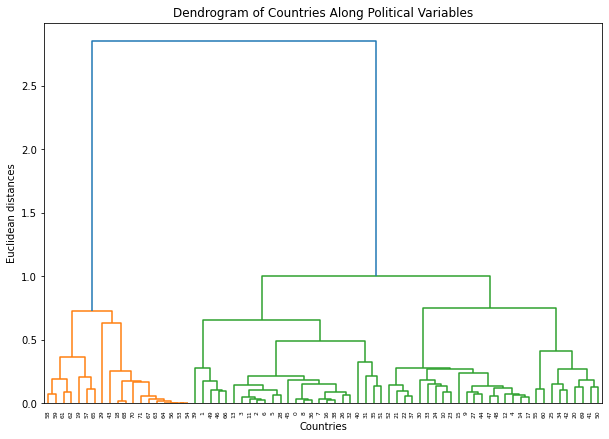

In [8]:
linkage_matrix = shc.linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram = shc.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.title('Dendrogram of Countries Along Political Variables')
plt.show()

13b. Add plt.axhline(y= _, color=’r’, linestyle=’--‘) to plot to
show where there is the largest gap between clusters. Hint: you need to set the
“y=…” to a number. Produce a new graph with the line.

Insert graph here:


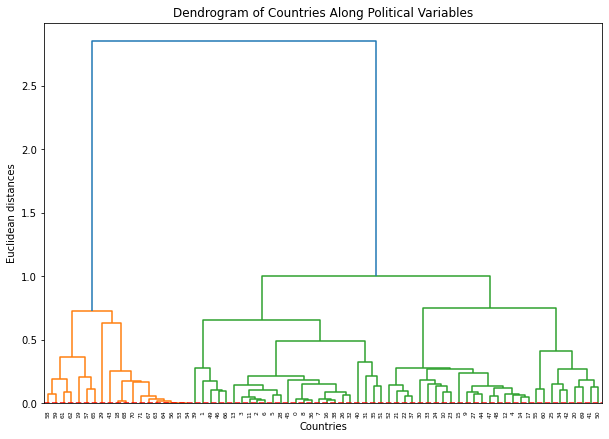

In [10]:
linkage_matrix = shc.linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram = shc.dendrogram(linkage_matrix)
largest_gap = 0
for i in range(1, len(linkage_matrix)):
    gap = linkage_matrix[i - 1, 2] - linkage_matrix[i, 2]
    if gap > largest_gap:
        largest_gap = gap
        largest_gap_index = i
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.title('Dendrogram of Countries Along Political Variables')

plt.axhline(y=largest_gap, color='r', linestyle='--')
plt.show()

13c. How many clusters does this imply you should have? Hint: look at where the
dendrogram switches colors from top to bottom.

Answer:

#### 14. Create N clusters where N is the number of clusters from the previous question, using different clustering methods:
14a.  Hierarchical Clustering: Use AgglomerativeClustering with the options for
affinity=’euclidean’, and linkage=’ward’. Fit the prediction to df_scaled and save the cluster labels as a new column in the df_scaled dataframe with a column title
‘HC labels’.


In [ ]:
# Write the code you need (if any) to answer the questions above

14b. KMeans Clustering: Use KMeans with the option for random_state=1680. Fit
KMeans to df_scaled and save the cluster labels as a new column in the df_scaled
dataframe with a column title ‘KM labels’.

In [ ]:
# Write the code you need (if any) to answer the questions above

#### 15. Create 4 clusters using different clustering methods: 
15a. Hierarchical Clustering: Use AgglomerativeClustering with the options for
affinity=’euclidean’, and linkage=’ward’. Fit the prediction to df_scaled and save
the cluster labels as a new column in the df_scaled dataframe with a column title
‘HC labels 4’. 


In [ ]:
# Write the code you need (if any) to answer the questions above

15b. KMeans Clustering: Use KMeans with the option for random_state=1680. Fit
KMeans to df_scaled and save the cluster labels as a new column in the df_scaled
dataframe with a column title ‘KM labels 4’.

In [ ]:
# Write the code you need (if any) to answer the questions above

#### 16. Run the following code to show how the HC labels from 14.a relate to the Civl Lib and Yrs Open variables in df_scaled.
``` python
plt.scatter(df_scaled['Civl Lib'], df_scaled['Yrs Open'], c=df_scaled['HC labels'])
plt.xlabel('Civil Liberty Score (normalized)')
plt.ylabel('Years as Open Economy (normalized)')
plt.title('Civil Libertires vs. Open Economy:
Countries in Hierarchical Clusters')
plt.show()
```
Then adjust the code to produce graphs for [‘KM labels’, ‘HC labels 4’, ‘KM labels 4’].

Insert the four graphs here:


In [ ]:
# Write the code you need (if any) to answer the questions above

#### 17. Calculate the first and second principal components of df_scaled using
``` python 
PCA(n_components=2).fit_transform(df_scaled)
```
And add them to the df_scaled dataframe with titles ‘pc1’ and ‘pc2’.

In [ ]:
# Write the code you need (if any) to answer the questions above

17a. Produce four graphs showing the different clustering results [‘HC labels’,‘KC
labels’, ‘HC labels 4’, ‘KM labels 4’] with the first principal component on the x
axis and the second principal component on the y axis. Hint: use the code from 16
as a template for plotting here, but be sure to change the axis labels and the title.

Insert your four graphs here:

In [ ]:
# Write the code you need (if any) to answer the questions above

17b. Describe the differences in visualizing clusters using variables in 16 vs. using
PCA in 17? Why does PCA help with visualization? Summarize your answers in
2-3 sentences.

Answer here:


# IV. OLS vs LASSO vs RIDGE REGRESSIONS
#### 18. Run the following code to create training and testing splits of the df_fls dataframe
*You will need to copy and paste the code below into a code block:*
``` python
y=df_fls['y']
X=df_fls.drop(columns=['y'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1680)
```

In [ ]:
# Write the code you need (if any) to answer the questions above

#### 19. Run an OLS regression on the training data. Produce the summary statistics using .summary() and paste them here:

Summary: 

In [ ]:
# Write the code you need (if any) to answer the questions above

#### 20. Run a LASSO regression on the training data and search over different alpha parameters in using alphas=np.linspace(1e-6, 1, num=50). Hint: reference the review session example for coding LASSO.
20a. What is the optimal alpha that you find?

Answer:


In [ ]:
# Write the code you need (if any) to answer the questions above

20b. Insert a plot of alphas on the x axis and cv_errors on the y axis:


In [ ]:
# Write the code you need (if any) to answer the questions above

#### 21. Run a Ridge Regression on the training data and search over different alpha parameters in using alphas=np.linspace(1e-6, 1, num=50). Hint: reference the review session example for coding Ridge regressions.
21a. What is the optimal alpha that you find? 

Answer here:

In [ ]:
# Write the code you need (if any) to answer the questions above

21b. Insert a plot of alphas on the x axis and cv_errros on the y axis:

In [ ]:
# Write the code you need (if any) to answer the questions above

#### 22. Compare the regression coefficients from the three different approaches using:
``` python
coef_comp=pd.DataFrame({'var':X.columns, 'val_ols':olsReg.params.tolist(), 'val_lasso':lassoReg.coef_, 'var_ridge':ridgeReg.coef_})
```

22a. Insert the coef_comp table here:

```
```


In [ ]:
# Write the code you need (if any) to answer the questions above

22b. Write 2-3 sentences comparing the coefficients and explain why they are different.

Answer here:


22c. Look at the Table 4 in Varian (2014) (link to paper in Canvas). Compare you coefficients from LASSO to the column he has for the LASSO regression. Do you come to the same conclusions about which regressors to keep in the regression and their order of importance? If they are different, explain a possible reason for that.

Answer here: 

# V. CLASSIFICATION: LOGIT vs. NEURAL NETWORK

#### 23. Load the titanic3.csv file in as "df_titanic" from HW2_data.zip in the Canvas Assignment for HW2.


In [ ]:
# Write the code you need (if any) to answer the questions above

#### 24. In Varian (2014), "Big Data: New Tricks for Econometrics", there is a discussion about wanting to allow for nonlinearity in age to affect the prediction of survival of Titanic passengers. This problem will compare estimating a logit with estimating neural network (multilayer perceptron). Explain the following lines of code and run them:

In [ ]:
df_titanic.dropna(subset=['survived','age', 'sex','pclass'],inplace=True) 
df_titanic['female']= np.where(df_titanic['sex']=='female',1,0) 
y= df_titanic['survived']
X= df_titanic[['age','pclass', 'female']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1680) 

scaler=StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

MLP = MLPClassifier(hidden_layer_sizes=(4,2),
  random_state=1680,
                    activation='logistic', solver='adam', 
                    max_iter =500,
                    verbose=True, learning_rate_init=0.01) 
MLP.fit(X_train,y_train)
print(accuracy_score(y_train,MLP.predict(X_train)))
print(accuracy_score(y_test, MLP.predict(X_test)))

logitmodel = LogisticRegression(solver='liblinear', random_state=1680).fit(X_train, y_train) 
print(accuracy_score(y_train,logitmodel.predict(X_train)))
print(accuracy_score(y_test, logitmodel.predict(X_test)) )


24a. Compare the accuracy scores in-sample and out-of-sample for the logit regression and for the neural network in 2-3 sentences. 

Answer here:

In [ ]:
# Write the code you need (if any) to answer the questions above

24b. Is the difference between the accuracies what you would have expected? Spend 2-3 sentences discussing possible explanations for the differences. 

Answer here:


In [ ]:
# Write the code you need (if any) to answer the questions above

24c. Print out the descriptive statistics for y_train and y_test

Paste output here: 

In [ ]:
# Write the code you need (if any) to answer the questions above

#### 25. Now rerun the previous code, but add stratify=y into the train_test_split command.

25a. How do the descriptive statistics for y_train and y_test change and how do the accuracy scores change?

Answer here:

In [ ]:
# Write the code you need (if any) to answer the questions above

25b. What does “stratify” do and why would it change your results?

Answer here:  

In [ ]:
# Write the code you need (if any) to answer the questions above

#### 26. Look at the other variables in df_titanic. What other variables besides age do you think would be important in predicting survival?

26a. List the variables you think of as important here and explain why you think they would improve prediction. Hint: you may need to transform variables into numerical representations/dummy variables.

Answer here:

In [ ]:
# Write the code you need (if any) to answer the questions above

26b. Run the logit regression with the variables that you listed and print the accuracy below. Did your accuracy improve?

Answer here:

In [ ]:
# Write the code you need (if any) to answer the questions above